In [117]:
import pandas as pd

import numpy as np

import missingno as msno

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm 

import pandas as pd
import numpy as np

import shap

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from ucimlrepo import fetch_ucirepo 

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.utils.class_weight import compute_sample_weight

In [118]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
hepatitis = fetch_ucirepo(id=46) 

# data (as pandas dataframes) 
x = hepatitis.data.features 
y = hepatitis.data.targets -1

df = pd.concat([x,y],axis=1)

In [119]:
#plt.figure(figsize = (20,10))
#msno.bar(df)
#plt.show()

In [120]:
#Complete-case analysis 
cc = df.dropna().copy()

In [121]:
#drastic sample size reduction 
len(cc)

80

In [122]:
train=cc.sample(frac=0.7,random_state=200)
test=cc.drop(train.index)

In [123]:
#log_reg = sm.Logit(train.loc[:, train.columns != 'Class'], train['Class']).fit()

In [124]:
log_reg = LogisticRegression()

In [125]:
log_reg.fit(train.loc[:, train.columns != 'Class'], train['Class'])

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [126]:
log_reg.predict(train.loc[:, train.columns != 'Class'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [114]:
log_reg.score(train.loc[:, train.columns != 'Class'], train['Class'])

0.9642857142857143

In [115]:
log_reg.score(test.loc[:, test.columns != 'Class'], test['Class'])

0.75

In [127]:
df_copy = df.copy()
missing_mask = df_copy.isna()
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_values = df_copy.copy()
imputed_values[:] = imputer.fit_transform(df_copy)
df_copy[missing_mask] = imputed_values[missing_mask]

In [128]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.loc[:, df_copy.columns != 'Class'], df_copy['Class'], test_size=0.3)

In [129]:
log_reg.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [130]:
log_reg.predict(X_train)

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [131]:
log_reg.score(X_train, y_train)

0.8425925925925926

In [132]:
log_reg.score(X_test, y_test)

0.9787234042553191

In [134]:
X100 = shap.utils.sample(X_train, len(X_train))


In [137]:
explainer = shap.Explainer(log_reg.predict, X100)
shap_values = explainer(X_train)

In [150]:
sample_ind = 20

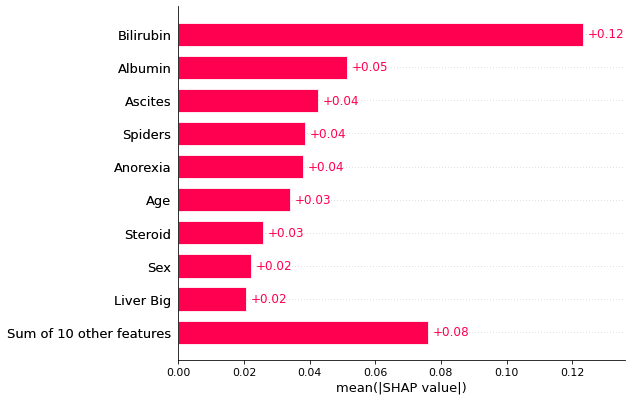

In [151]:
shap.plots.bar(shap_values)

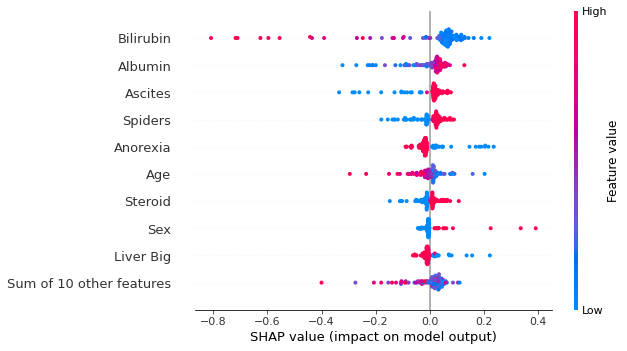

In [170]:
shap.plots.beeswarm(shap_values)
